In [1]:
# Deriving Angle Value by using High-precision amplitude evaluation device

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# file
file = "../data/3p08/Lcam/img_5_3p08_27.5deg.csv"
df = pd.read_csv(file, index_col=0)
sample_name = file[-22:-4]
print(sample_name)
df.head()

img_5_3p08_27.5deg


,Time,-x,+x,2x,-y,+y,2y
0,1.105217,-27.101923,27.697153,54.799076,-18.779317,18.771292,37.550609
1,1.214391,-27.101923,27.697153,54.799076,-18.779317,18.771292,37.550609
2,1.326012,-27.101923,27.697153,54.799076,-18.779317,18.722162,37.501479
3,1.437664,-27.101923,27.697153,54.799076,-18.779317,18.771292,37.550609
4,1.558973,-27.101923,27.741058,54.842981,-18.779317,18.722162,37.501479


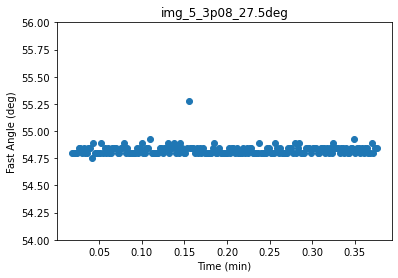

In [3]:
plt.xlabel("Time (min)")
plt.ylabel("Fast Angle (deg)")
plt.title(sample_name)
plt.ylim(54,56)
plt.scatter(df["Time"]/60, df["2x"])
#plt.savefig(file[:-4] + "_fast.png")

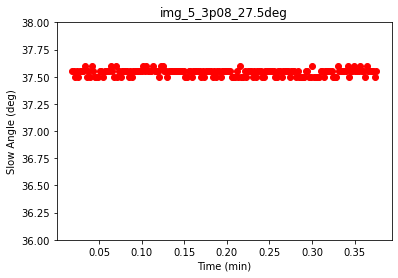

In [4]:
plt.xlabel("Time (min)")
plt.ylabel("Slow Angle (deg)")
plt.title(sample_name)
plt.ylim(36,38)
plt.scatter(df["Time"]/60, df["2y"], color='red')
#plt.savefig(file[:-4] + "_slow.png")

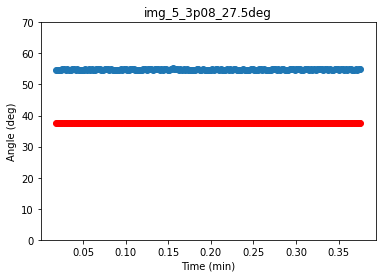

In [5]:
plt.xlabel("Time (min)")
plt.ylabel("Angle (deg)")
plt.title(sample_name)
plt.ylim(0,70)
plt.scatter(df["Time"]/60, df["2x"])
plt.scatter(df["Time"]/60, df["2y"], color='r')
#plt.savefig(file[:-4] + "_all.png")